# **Spiking Graph AI for Anti-Money Laundering (AML)**

### Project Overview:

This project explores a hybrid AI model for detecting illicit activity in cryptocurrency networks. It combines:

- **Graph Neural Networks (GNNs)** – to model the structure of Bitcoin transaction networks
- **Spiking Neural Networks (SNNs)** – to capture time-dependent patterns using biologically inspired neurons

The model is trained on the **Elliptic Bitcoin dataset**, which includes over 200,000 transactions labeled as licit, illicit, or unknown. By learning both **who is connected to whom** and **how behavior changes over time**, this system aims to detect money laundering patterns more effectively than traditional methods.

---

### Goals:
- Load and explore the Elliptic Bitcoin graph
- Encode transaction features into spike trains
- Build a GNN baseline for classification
- Integrate SNN layers for temporal modeling
- Compare performance of GNN-only vs GNN+SNN hybrid

---

### Tools Used:
- `pandas`, `numpy` for data processing
- `networkx` for graph visualization
- `PyTorch`, `PyTorch Geometric` for GNN modeling
- `SpikingJelly` (or custom code) for SNN layers
- `matplotlib`, `seaborn` for plots

---

### Dataset Summary:
- 203,769 nodes (Bitcoin transactions)
- 234,355 edges (connections between transactions)
- 166 features per node
- 49 time steps (discrete buckets)
- Labels:
  - `1` = Illicit
  - `0` = Licit
  - `-1` = Unknown (semi-supervised)

---

Let's begin by loading and visualizing the transaction network!


### STEP 1: LOADING THE DATA

In [11]:
import pandas as pd

data = pd.read_csv(r'elliptic_txs_edgelist.csv')

data.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


After loading the data, we will create a graph, or to be specific, a directed graph. A directed graph means it has directed relationships. Like A -> B, but it is not the same as B -> A. Just know, that in a graph, nodes(entities) are like end points, and edges are relationships between them.

For example, lets say i'm sending money to my friend.

My account(a node) -> Friend's account(a node).

I(node) sent money(edge) to my friend(node), can be considered as an edge between two nodes.

We can now create a directed graph using NetworkX library from python. It can be created like this.

G = nx.from_pandas_edgelist(data, node1(source), node2(target), create_using=nx.DiGraph())

**Creating a DIRECTED GRAPH**

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

Graph = nx.from_pandas_edgelist(data, 'txId1', 'txId2', create_using=nx.DiGraph())    # Creating a directed graph.

**Checking for number of nodes and edges**

In [15]:
print(Graph.number_of_nodes())
print(Graph.number_of_edges())

203769
234355


Now we will view the first 5 nodes of the Graph.

In [18]:
list(Graph.nodes)[:5]

[230425980, 5530458, 232022460, 232438397, 230460314]

**Please Note** Nodes created on a graph through NetworkX or any library cannot be viewed as a list, because they are a view-like object(Node.View in NetworkX), which is why, to view and access the number of nodes in sequence like first 5 or first 10, like we do with lists by slicing [:5], won't work with them. So, we convert the nodes into a list and then access them by slicers. Which is why you may note that the items were accessed by putting the slicers outside of the parantheses like: list **(Graph.nodes)[:5]**, unlike with lists like: **Graph.nodes[:5]** :


In [23]:
list(Graph.successors(230460314))   # This shows us all the nodes we have edges with, with 230460314 being the initial node.

[230459870,
 230460307,
 230459688,
 230570333,
 230459930,
 3276131,
 230575202,
 230569936]

**NOTE:** You may notice that even **Graph.successors** are wrapped in a list, and that is because `Graph.successors(node)` returns an iterator, not a list. An iterator is like a one-time use object that lets you loop through items one by one.

For example: Let's say we want to see all the nodes that have edges with the node 230460314.

In [27]:
Graph.successors(230460314)

In [28]:
gs = Graph.successors(230460314)

for g in gs:

  print(g)

230459870
230460307
230459688
230570333
230459930
3276131
230575202
230569936


As we can see, we can loop through the iterator `gs`

In [29]:
list(Graph.predecessors(230569936))  # leads back to the original node.

[230460314]

### Visualizing the Graph

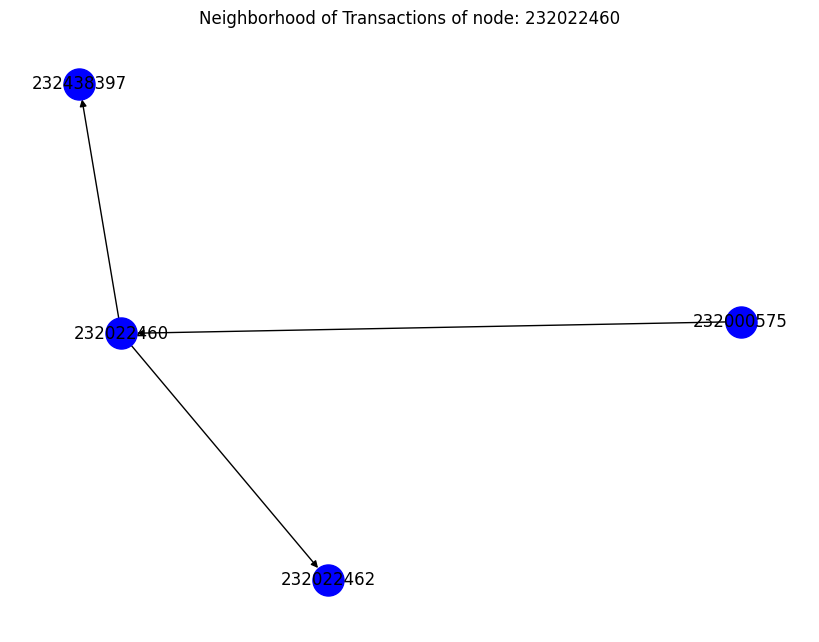

In [37]:
node_id = 232022460

successors = list(Graph.successors(node_id))
predecessors = list(Graph.predecessors(node_id))

# We will wrap node_id with [] to make a list so that we can CONCATENATE successors and predecessors with it.

nodes_to_add = [node_id] + successors + predecessors

subgraph = Graph.subgraph(nodes_to_add) # creating a subgraph out of the main graph, to not affect it as a whole.

# Creating a Subgraph

plt.figure(figsize=(8,6))  # creating a figure 8 inches wide, 6 inches tall.
nx.draw(subgraph, with_labels= True, node_size = 500, node_color= 'blue')
plt.title(f"Neighborhood of Transactions of node: {node_id}")
plt.show()
